# Using Naive Bayes to Determine Twitter Sentiment
As a project for my Knowledge Technologies class I was required to analyze a Twitter set and try to determine the sentiment of the tweets.

The dataset contained over 30K labeled tweets. The scope of this project does not include feature engineering/selection so it was ommited. The main goal was to analyze the results of Naive Bayes via its main metrics.

## Import required libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
from main_metrics import main_metrics

Load the data to manipulate it

In [3]:
train=pd.read_csv('path/to/file')
dev=pd.read_csv('path/to/file')

Let's have a quick look at the data

In [4]:
train.head()

,id,a,amazing,antman,are,at,awesome,best,birthday,cant,...,see,shit,so,stupid,supremacists,th,they,tomorrow,trump,sentiment
0,8.023340e+17,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,6.247650e+17,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
2,8.055830e+17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
3,6.374800e+17,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,positive
4,6.410960e+17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,neutral


Now we need to use separate the labels from the data as well as remove the "id" column

In [5]:
train_data=train[train.columns[1:-1]]
train_target=train[train.columns[-1]]
train_data.head()

,a,amazing,antman,are,at,awesome,best,birthday,cant,cream,...,racist,see,shit,so,stupid,supremacists,th,they,tomorrow,trump
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
dev_data=dev[dev.columns[1:-1]]
dev_target=dev[dev.columns[-1]]
dev_target.head()

0     neutral
1     neutral
2    positive
3     neutral
4    positive
Name: sentiment, dtype: object

We create the model leveragin the power of Scikit-learn

In [7]:
gnb = GaussianNB(priors=None)
model_naives=gnb.fit(train_data, train_target)
predictions_naives=model_naives.predict(dev_data)

In [8]:
cm=confusion_matrix(dev_target,predictions_naives,labels=['positive','negative','neutral'])
print cm

[[ 874   48  566]
 [ 188  312  538]
 [ 629  226 1545]]


In [9]:
df=main_metrics(cm,['positive','negative','neutral'])
df

,negative,neutral,positive
FP,274.000000,1104.000000,817.000000
FN,726.000000,855.000000,614.000000
TP,312.000000,1545.000000,874.000000
TN,3614.000000,1422.000000,2621.000000
TPR,0.300578,0.643750,0.587366
TNR,0.929527,0.562945,0.762362
PPV,0.532423,0.583239,0.516854
NPV,0.832719,0.624506,0.810201
FPR,0.070473,0.437055,0.237638
FNR,0.699422,0.356250,0.412634


Although the overall accuracy is not a very good measure of the effectiveness of the classifier, it does provide some initial information about the overall result.

In [10]:
accuracy=(dev_target == predictions_naives).sum()/float(len(dev_target))*100
print "{0:.00f}%".format(accuracy)

55%


In [11]:
def labels(x):
    if x=='positive':
        return 1
    elif x=='negative':
        return -1
    else:
        return 0

In [12]:
dev_targ_lbls=[]
y_pred_lbls=[]
for i in range(len(dev_target)):
    dev_targ_lbls.append(labels(dev_target[i]))
    y_pred_lbls.append(labels(predictions_naives[i]))

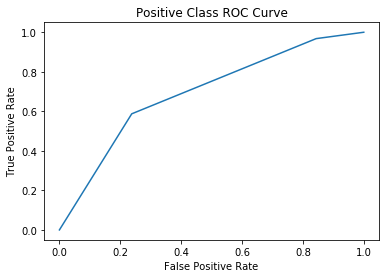

AUC 69%


In [13]:
fpr_naive_pos, tpr_naive_pos, thresholds_naive_pos = roc_curve(dev_targ_lbls, y_pred_lbls, pos_label=1)
plt.plot(fpr_naive_pos, tpr_naive_pos)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Positive Class ROC Curve')
plt.show()
print "AUC","{0:.00f}%".format(metrics.auc(fpr_naive_pos, tpr_naive_pos)*100)

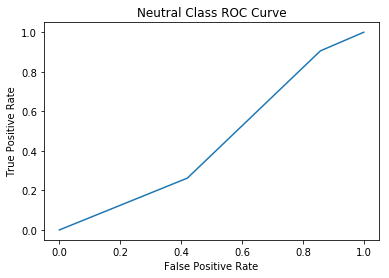

AUC 45%


In [14]:
fpr_naive_neu, tpr_naive_neu, thresholds_naive_pos = roc_curve(dev_targ_lbls, y_pred_lbls, pos_label=0)
plt.plot(fpr_naive_neu, tpr_naive_neu)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Neutral Class ROC Curve')
plt.show()
print "AUC","{0:.00f}%".format(metrics.auc(fpr_naive_neu, tpr_naive_neu)*100)

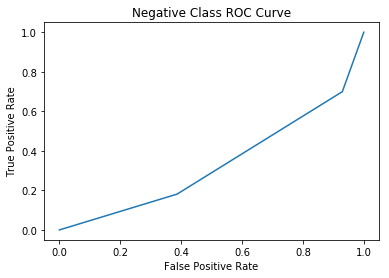

AUC 33%


In [15]:
fpr_naive_neg, tpr_naive_neg, thresholds_naive_pos = roc_curve(dev_targ_lbls, y_pred_lbls, pos_label=-1)
plt.plot(fpr_naive_neg, tpr_naive_neg)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Negative Class ROC Curve')
plt.show()
print "AUC","{0:.00f}%".format(metrics.auc(fpr_naive_neg, tpr_naive_neg)*100)

In [16]:
download=pd.DataFrame(predictions_naives)
download.to_csv("Naive.csv")